# HW6: Decision Trees and Random Forrests

## Data Wrangling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
!ls | grep csv

Credit_card.csv
Credit_card_label.csv


### Merging the data

In [3]:
features = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")

In [4]:
features.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


Let's join these dataframes on their ID

In [6]:
df = features.merge(labels, on="Ind_ID")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
df.drop(columns="Ind_ID", inplace=True)

### Renaming Columns
Now let's rename these columns so they all have the same style

In [8]:
def capitalize_header(header):
    words = header.split("_")
    capitalized_words = (word.capitalize() for word in words)
    return "_".join(capitalized_words)

In [10]:
df.columns = list(map(capitalize_header, df.columns))

In [11]:
# Fix spelling
df.rename(columns={"Propert_Owner": "Property_Owner"}, inplace=True)

### Replace NaNs

In [12]:
df.isna().sum()

Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_Income       23
Type_Income          0
Education            0
Marital_Status       0
Housing_Type         0
Birthday_Count      22
Employed_Days        0
Mobile_Phone         0
Work_Phone           0
Phone                0
Email_Id             0
Type_Occupation    488
Family_Members       0
Label                0
dtype: int64

For Gender, I will set all NaNs to the mode which in this case is Female. For annual income and birthday count I will set those to the averages of their respective columns. Finally, for type_occupation I will set it to an "Other" category.

In [13]:
df.Gender.fillna(df.Gender.mode()[0], inplace=True)
df.Annual_Income.fillna(df.Annual_Income.mean(), inplace=True)
df.Birthday_Count.fillna(df.Birthday_Count.mean(), inplace=True)
df.Type_Occupation.fillna("Other", inplace=True)

### Set categorical variables

In [14]:
categorical_vars = ["Gender", "Car_Owner", "Property_Owner", "Type_Income", "Education", "Marital_Status", "Housing_Type", "Mobile_Phone", "Work_Phone", "Phone", "Email_Id", "Type_Occupation"]

for var in categorical_vars:
    df[var] = pd.Categorical(df[var])

## Create Train / Test Splits

In [15]:
import random
random.seed(40)
trn_df, val_df = train_test_split(df)
trn_df.shape, val_df.shape

((1161, 18), (387, 18))

In [16]:
trn_df[categorical_vars] = trn_df[categorical_vars].apply(lambda x: x.cat.codes)
val_df[categorical_vars] = val_df[categorical_vars].apply(lambda x: x.cat.codes)

In [17]:
def xs_y(df, dep):
    """
    Splits numpy array into two arrays, one containing all the feature columns and one containing the label
    
    @param df - all data
    @param dep - column name of the dependent variable
    """
    xs = df.drop(columns=[dep])
    return xs,df[dep] if dep in df else None

trn_xs,trn_y = xs_y(trn_df, "Label")
val_xs,val_y = xs_y(val_df, "Label")

## Create and fit decision tree

In [18]:
tree = DecisionTreeClassifier(min_samples_leaf=50)
fit_tree = tree.fit(trn_xs, trn_y)

In [30]:
import graphviz
from sklearn.tree import export_graphviz
import re

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

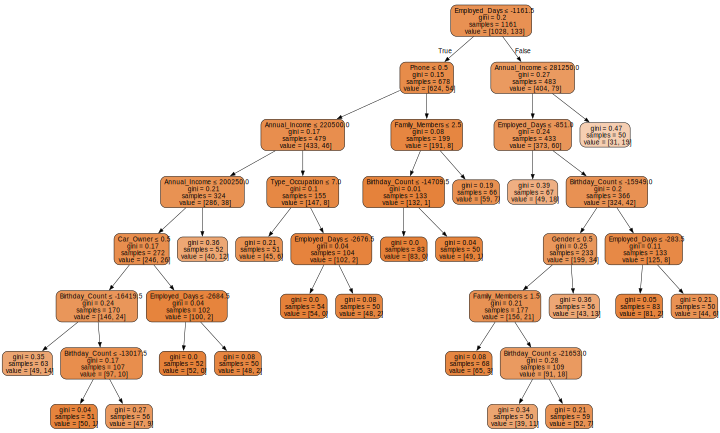

In [32]:
draw_tree(fit_tree, trn_xs)

In this graph, the dark orange nodes are better predictors of not defaulting on credit. The light orange have slightly more people defaulting on credit than the dark orange but in all these nodes, there are more that did not default on credit vs those that did. This somewhat makes sense since only 11% of the rows in the training set defaulted on their credit.

In [34]:
trn_y.sum() / trn_y.shape[0]

0.11455641688199827

In [40]:
tree_pred = fit_tree.predict(val_xs)
tree_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
(tree_pred == val_y).mean()

0.8914728682170543

Our single tree was able to get an accuracy scor of 89%! However, while this may seem good, the tree projected that every person in the validation set would not default on their credit. So, in fact, the high accuracy is simply a product of the fact that only a very small percentage (~11%) of the people in the dataset (and likely in general) defaulted on their credit.

## Random Forrest

We will try to solve this problem of error in our fitted tree with a random forrest. Instead of using one tree to make our prediction, we will use a collection of unbiased random trees each with their own error to make a prediction. Since this error is random in direction, the mean of this error should approach 0 as n_trees increases meaning a more accurate prediction. One thing to note is random forrests is not a new type of model but rather a method of ensembling or bagging which is why it is imported from the ensemble package in sklearn.

We will start by making a random forrest from scratch and then will use sklearn's random forrest library. Note we can get away with a smaller number of samples per leaf with a random forrest because the averaging prevents overfitting in general by reducing the impact of any one tree.

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forrest = RandomForestClassifier(min_samples_leaf=5)
forrest.fit(trn_xs, trn_y)
rf_preds = forrest.predict(val_xs)
print(f"Error={mean_absolute_error(val_y, rf_preds)}; Accuracy={(rf_preds == val_y).mean()}")

Error=0.10852713178294573; Accuracy=0.8914728682170543


Interestingly, we still get the same accuracy as before. Let's try a smaller number of samples per leaf to try and catch the fewer cases of credit defaulting.

In [76]:
rf2 = RandomForestClassifier(min_samples_leaf=1)
rf2.fit(trn_xs, trn_y)
rf2_preds = rf2.predict(val_xs)
print(f"Error={mean_absolute_error(val_y, rf2_preds)}; Accuracy={(rf2_preds == val_y).mean()}")

Error=0.07235142118863049; Accuracy=0.9276485788113695


We have increased our accuracy to almost 93%! One more interesting thing we can do with random forrests is get a feature importance plot which specifies how important different features were in the forrest for making decisions. The sum of these proportions is 1 which leads me to believe they are calculated as the proportion of times that feature was used to make a decision in the forrest.

### Feature importance

In [83]:
rf2.feature_importances_

array([0.02858712, 0.02613953, 0.02606442, 0.03004582, 0.1647276 ,
       0.03603403, 0.03282396, 0.04241581, 0.03087263, 0.21523801,
       0.16968377, 0.        , 0.02284753, 0.0241402 , 0.01703455,
       0.08685769, 0.0464873 ])

This doesn't mean much as proportions but let's put this into a feature importance plot.

<AxesSubplot: ylabel='cols'>

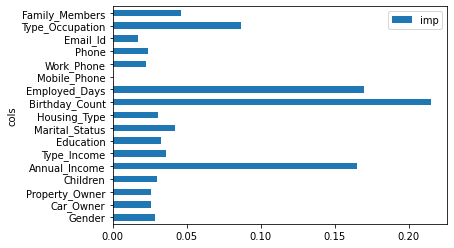

In [102]:
importance = pd.DataFrame(dict(cols=trn_xs.columns, imp=rf2.feature_importances_))
importance.plot(x="cols", y="imp", kind="barh")

In [101]:
importance.sort_values(by=["imp"], ascending=False).head()

,cols,imp
9,Birthday_Count,0.215238
10,Employed_Days,0.169684
4,Annual_Income,0.164728
15,Type_Occupation,0.086858
16,Family_Members,0.046487


This shows that Birthday_Count (age) was the most important factor in the forrest, followed by the number of days they were employed and their annual income.